Exploring:

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [57]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [58]:
import openpyxl 

In [59]:
url='E-commerce_data.xlsx'
excel=pd.ExcelFile(url)

In [60]:
excel.sheet_names

['customers', 'genders', 'cities', 'transactions', 'branches', 'merchants']

In [61]:
df=excel.parse('customers')
df

,customer_id,join_date,city_id,gender_id
0,1,2022-01-08,7,1
1,2,2023-05-02,20,2
2,3,2023-05-14,15,1
3,4,2022-11-25,11,2
4,5,2023-04-26,8,1
...,...,...,...,...
995,996,2022-10-28,3,1
996,997,2022-07-07,20,2
997,998,2024-03-09,11,2
998,999,2022-07-16,6,1


In [62]:
df.dtypes

customer_id             int64
join_date      datetime64[ns]
city_id                 int64
gender_id               int64
dtype: object

In [63]:
df1=excel.parse('transactions')
df1

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6
...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7


In [64]:
type(df1)

pandas.core.frame.DataFrame

In [65]:
df1.dtypes

transaction_id                 int64
customer_id                    int64
transaction_date      datetime64[ns]
transaction_status            object
coupon_name                   object
burn_date             datetime64[ns]
branch_id                      int64
dtype: object

In [66]:
df.isna().sum()

customer_id    0
join_date      0
city_id        0
gender_id      0
dtype: int64

In [67]:
df.duplicated().sum()

0

In [68]:
df1.duplicated().sum()

0

In [69]:
gender=excel.parse('genders')
gender

,gender_id,gender_name
0,1,Male
1,2,Female


In [70]:
gender.isna().sum()

gender_id      0
gender_name    0
dtype: int64

In [71]:
city=excel.parse('cities')
city

,city_id,city_name
0,1,Cairo
1,2,Alexandria
2,3,Giza
3,4,Shubra El-Kheima
4,5,Port Said
5,6,Suez
6,7,Mansoura
7,8,El-Mahalla El-Kubra
8,9,Tanta
9,10,Asyut


OUR DATA IS CLEAN!

In [72]:
# merging related columns to easily explore the distribution
fulldata=df.merge(gender,on='gender_id')\
.merge(df1,on='customer_id')\
.merge(city,on='city_id')
fulldata

,customer_id,join_date,city_id,gender_id,gender_name,transaction_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,city_name
0,1,2022-01-08,7,1,Male,178,2022-07-30,subscribed,SrP-866,NaT,8,Mansoura
1,1,2022-01-08,7,1,Male,257,2022-09-19,burned,krI-075,2022-11-05,1,Mansoura
2,1,2022-01-08,7,1,Male,1652,2022-06-09,burned,quk-137,2022-07-19,6,Mansoura
3,1,2022-01-08,7,1,Male,1929,2022-07-30,burned,QiG-754,2022-10-18,8,Mansoura
4,1,2022-01-08,7,1,Male,2352,2023-03-24,subscribed,OtC-985,NaT,4,Mansoura
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,999,2022-07-16,6,1,Male,541,2023-05-18,burned,rqU-020,2023-07-15,8,Suez
4996,999,2022-07-16,6,1,Male,2216,2022-12-21,burned,VoR-120,2023-02-17,2,Suez
4997,999,2022-07-16,6,1,Male,3996,2024-04-09,burned,vGo-341,2024-05-07,3,Suez
4998,1000,2024-04-08,2,2,Female,1159,2024-04-20,subscribed,TmE-861,NaT,8,Alexandria


In [73]:
#checking type after merging
type(fulldata)

pandas.core.frame.DataFrame

EXPLORING DISTRIBUTION:

<Axes: xlabel='transaction_date', ylabel='transaction_id'>

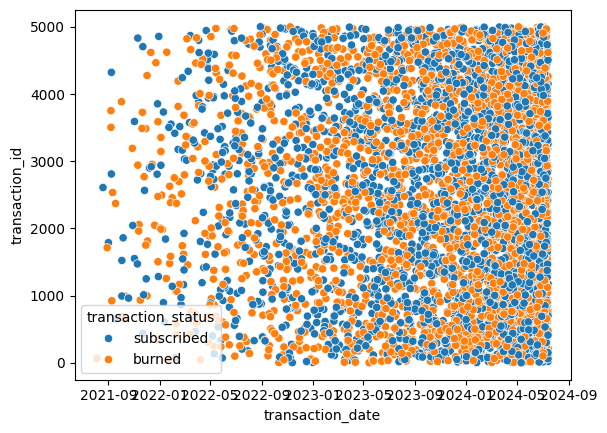

In [74]:
sns.scatterplot(data=fulldata,x='transaction_date',y='transaction_id',hue='transaction_status')

<Axes: xlabel='city_name'>

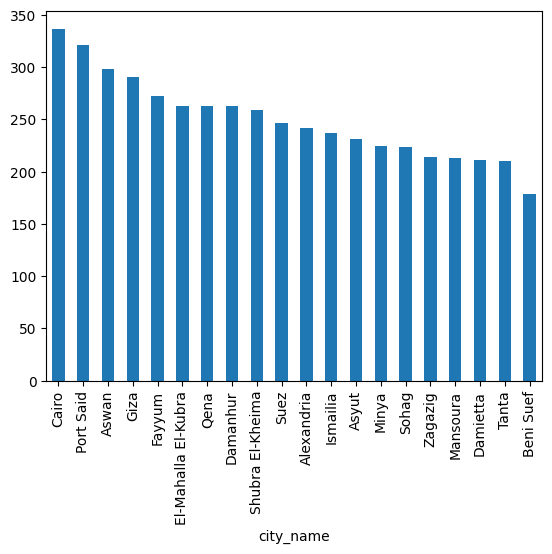

In [75]:
fulldata['city_name'].value_counts().plot(kind='bar')

<Axes: xlabel='transaction_status'>

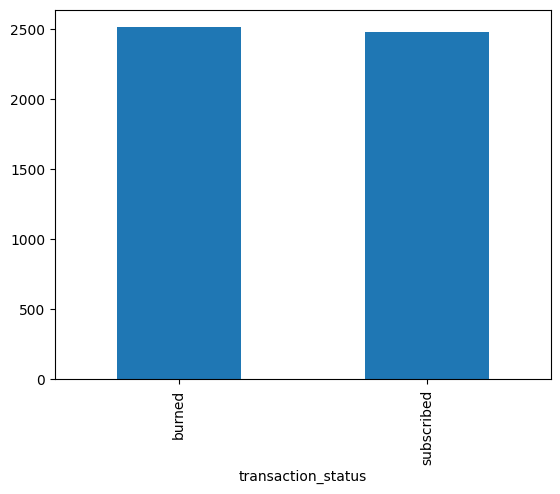

In [76]:
fulldata['transaction_status'].value_counts().plot(kind='bar')

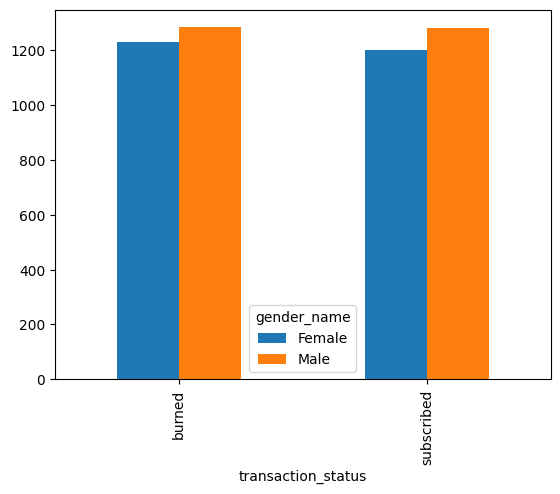

In [77]:
pd.crosstab(fulldata['transaction_status'],fulldata['gender_name']).plot(kind='bar')
plt.show()

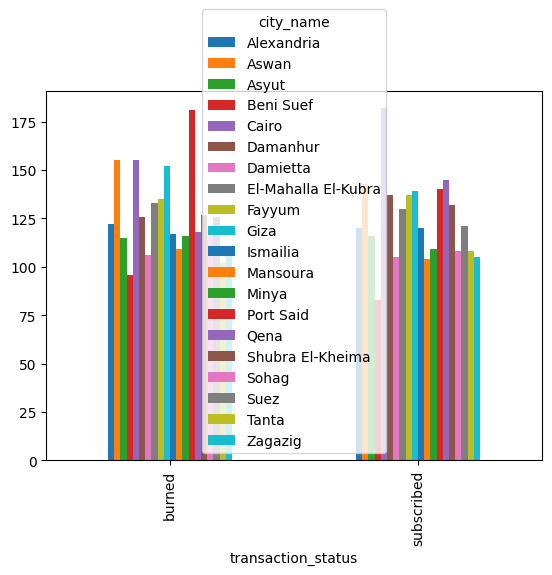

In [78]:
pd.crosstab(fulldata['transaction_status'],fulldata['city_name']).plot(kind='bar')
plt.show()

<Axes: xlabel='customer_id', ylabel='transaction_id'>

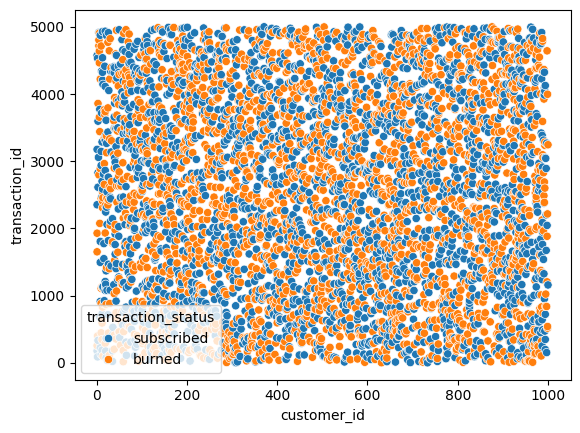

In [79]:
sns.scatterplot(data=fulldata,x='customer_id',y='transaction_id',hue='transaction_status')

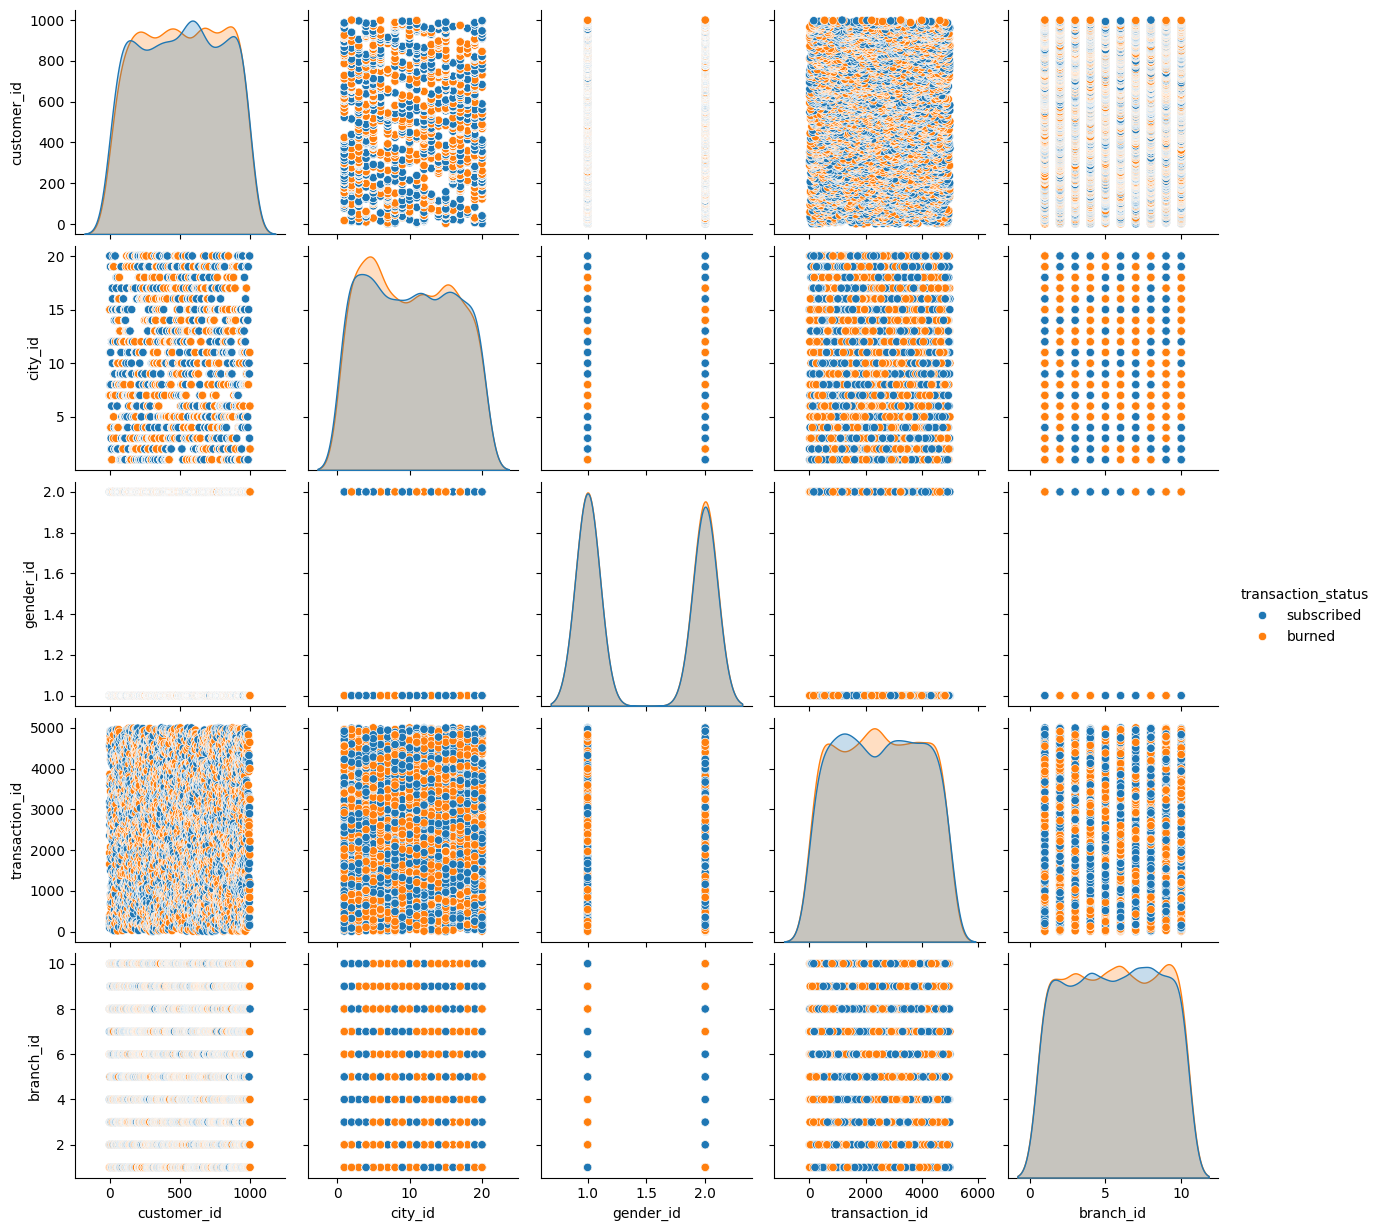

In [80]:
sns.pairplot(fulldata,hue='transaction_status',height=2.5)

Kmeans model:

In [81]:

data=fulldata[['customer_id','transaction_id']]
d_log=np.log(data)

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [83]:
std_scaler = StandardScaler()
d_scaled = std_scaler.fit_transform(d_log)

In [84]:
#try kmeans with different clusters
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(d_scaled)
    errors.append(model.inertia_)

<Axes: title={'center': 'Elbow Method'}, xlabel='k', ylabel='SSE'>

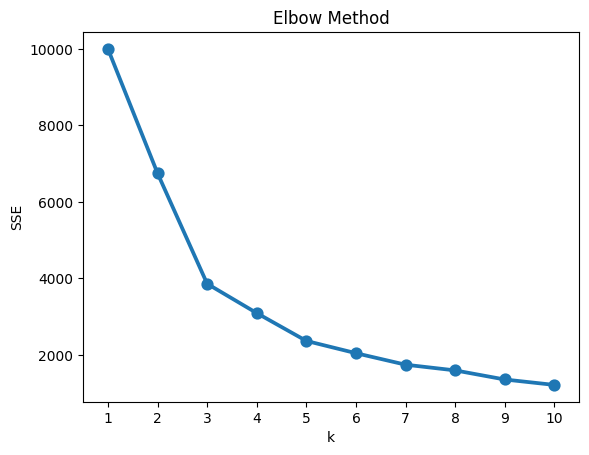

In [85]:
#to know the optimal cluster using elbow method
plt.title('Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)

In [86]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [87]:
# to make sure about the optimal cluster using kneelocater
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 3


In [88]:
model = KMeans(n_clusters = 3, random_state=42)
model.fit(d_scaled)

KMeans(n_clusters=3, random_state=42)

In [89]:
data = data.assign(ClusterLabel= model.labels_)

In [90]:
from sklearn.metrics import silhouette_score
print(silhouette_score(d_scaled, model.labels_, metric='euclidean'))

0.48925778265387326


In [91]:
data.groupby("ClusterLabel")[["customer_id", "transaction_id"]].median()

,customer_id,transaction_id
ClusterLabel,,
0,612.0,2993.0
1,546.0,464.0
2,104.0,2718.0


cluster 0: the mid value in customers was 612 customer in total and made about 2993 transaction                                                     
cluster 1: the mid value in customers was 546 custimer in total and made about 464 transaction                                                      
cluster 2: the mid value in customer was 104 customer in total and made about 2718 transaction                                                      
So ,we could give coupons to cluster 2 to increase transactions and total sales 

In [92]:
# try kmeans using another two features: gender,transaction_id
data=fulldata[['gender_id','transaction_id']]
d_log=np.log(data)

In [93]:
std_scaler = StandardScaler()
d_scaled = std_scaler.fit_transform(d_log)

In [94]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(d_scaled)
    errors.append(model.inertia_)

<Axes: title={'center': 'Elbow Method'}, xlabel='k', ylabel='SSE'>

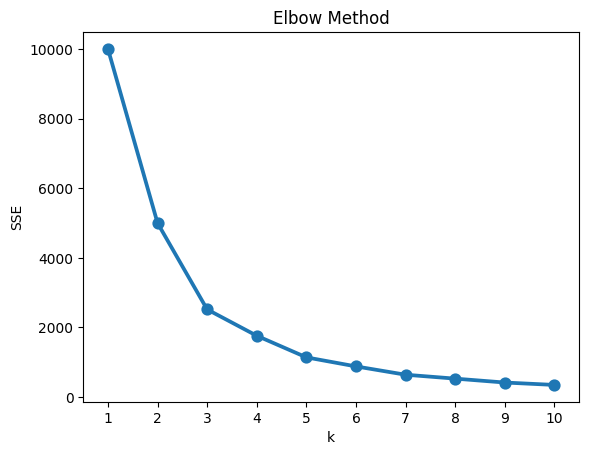

In [95]:
plt.title('Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)

In [96]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 3


In [97]:
model = KMeans(n_clusters = 3, random_state=42)
model.fit(d_scaled)

KMeans(n_clusters=3, random_state=42)

In [98]:
data = data.assign(ClusterLabel= model.labels_)

In [99]:
print(silhouette_score(d_scaled, model.labels_, metric='euclidean'))

0.6478903602406025


In [100]:
data.groupby("ClusterLabel")[["gender_id", "transaction_id"]].median()

,gender_id,transaction_id
ClusterLabel,,
0,1.0,2801.5
1,2.0,2807.0
2,1.0,304.0


cluster 0:Males make on average 2802 transactions                                                                                  
cluster 1:females make on average 2807 transactions                                                                                   
cluster 2:Males make on average 304 transactions                                                                              
So, we should give coupons to cluster 1to increase sales